## H2O AutoML Binary Classification Demo



**Start H2O**
Import the h2o Python module and 
`H2OAutoML class and initialize a local H2O cluster.`

In [2]:
!pip install h2o

     |████████████████████████████████| 176.0 MB 6.8 kB/s 
  Created wheel for h2o: filename=h2o-3.36.0.2-py2.py3-none-any.whl size=176112127 sha256=de7bb17c0c89b39cb4bcd66793d7ec5ec3bb9bec9cbd7261cdfb319b6f310df9
  Stored in directory: /root/.cache/pip/wheels/0b/83/bd/343a6140119b4098103e725e1cfe9f198568d13cf103acbc7c
Successfully built h2o


In [3]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.13" 2021-10-19; OpenJDK Runtime Environment (build 11.0.13+8-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.13+8-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpe4sgmyhh
  JVM stdout: /tmp/tmpe4sgmyhh/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpe4sgmyhh/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.2
H2O_cluster_version_age:,15 days
H2O_cluster_name:,H2O_from_python_unknownUser_1nrxr5
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


**Load Data**
For the AutoML binary classification demo, we use a subset of the `Product Backorders dataset`. The goal here is to predict whether or not a product will be put on backorder status, given a number of product metrics such as current inventory, transit time, demand forecasts and prior sales.

In [4]:
# Use local data file or download from GitHub
import os
data_path = "https://github.com/h2oai/h2o-tutorials/raw/master/h2o-world-2017/automl/data/product_backorders.csv"

In [6]:
# Load data into H2O
df = h2o.import_file(data_path)
df.describe()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Rows:19053
Cols:23




,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
type,int,int,int,int,int,int,int,int,int,int,int,int,enum,int,real,real,int,enum,enum,enum,enum,enum,enum
mins,1111620.0,-1440.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,-99.0,-99.0,0.0,,,,,,
mean,2059552.76056264,376.36702881436014,7.706036161335188,48.272345562378625,182.91082769117727,344.739830997743,497.79242114102766,56.11887891670605,168.53445651603428,333.53219965359773,504.2553928515193,48.84070750013117,,2.3114995013908572,-6.519833622001783,-6.05393533826694,0.8917755734005144,,,,,,
maxs,3284775.0,730722.0,52.0,170920.0,479808.0,967776.0,1418208.0,186451.0,550609.0,1136154.0,1759152.0,85584.0,,13824.0,1.0,1.0,1440.0,,,,,,
sigma,663337.6456498688,7002.071628662688,6.778665072124189,1465.9992102068293,4304.865591970626,8406.062155159243,12180.570042918358,1544.2177775482573,4581.340080221506,9294.566153218986,14184.14539565363,968.7738680675265,,110.24106014611986,25.975138766871876,25.184497150032527,23.033345417338797,,,,,,
zeros,0,1858,121,15432,12118,11136,10604,10278,8022,6864,6231,9909,,18601,474,401,18585,,,,,,
missing,0,0,1078,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1113121.0,0.0,8.0,1.0,6.0,6.0,6.0,0.0,4.0,9.0,12.0,0.0,No,1.0,0.9,0.89,0.0,No,No,No,Yes,No,Yes
1,1113268.0,0.0,8.0,0.0,2.0,3.0,4.0,1.0,2.0,3.0,3.0,0.0,No,0.0,0.96,0.97,0.0,No,No,No,Yes,No,Yes
2,1113874.0,20.0,2.0,0.0,45.0,99.0,153.0,16.0,42.0,80.0,111.0,10.0,No,0.0,0.81,0.88,0.0,No,No,No,Yes,No,Yes


We will notice that the response column, **"went_on_backorder"**, is already encoded as `"enum"`, so there's nothing we need to do here. If it were encoded as a 0/1 `"int"`, then we'd have to convert the column as follows: `df[y] = df[y].asfactor()`

Next, let's identify the response & predictor columns by saving them as x and y. The "sku" column is a unique identifier so we'll want to remove that from the set of our predictors.

In [7]:
y = "went_on_backorder"
x = df.columns
x.remove(y)
x.remove("sku")

## Run AutoML
Run AutoML, stopping after 10 models. The `max_models` argument specifies the number of individual (or "base") models, and does not include the two ensemble models that are trained at the end.

In [8]:
aml = H2OAutoML(max_models = 10, seed = 1)
aml.train(x = x, y = y, training_frame = df)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_2_AutoML_1_20220210_180148

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.030951593096287196
RMSE: 0.1759306485416546
LogLoss: 0.11075261619348245
Null degrees of freedom: 10047
Residual degrees of freedom: 10040
Null deviance: 7374.79508175929
Residual deviance: 2225.6845750242232
AIC: 2241.6845750242232
AUC: 0.9833396352325683
AUCPR: 0.9155289735033171
Gini: 0.9666792704651366

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4570099114296: 


,,No,Yes,Error,Rate
0,No,8695.0,147.0,0.0166,(147.0/8842.0)
1,Yes,243.0,963.0,0.2015,(243.0/1206.0)
2,Total,8938.0,1110.0,0.0388,(390.0/10048.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.457010,0.831606,170.0
1,max f2,0.173214,0.861834,264.0
2,max f0point5,0.559027,0.871678,142.0
3,max accuracy,0.511690,0.961186,154.0
4,max precision,0.992318,1.000000,0.0
5,max recall,0.004102,1.000000,390.0
6,max specificity,0.992318,1.000000,0.0
7,max absolute_mcc,0.457010,0.810604,170.0
8,max min_per_class_accuracy,0.190894,0.932007,256.0
9,max mean_per_class_accuracy,0.173214,0.935749,264.0



Gains/Lift Table: Avg response rate: 12.00 %, avg score: 12.18 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010052,0.952894,8.331675,8.331675,1.000000,0.968312,1.000000,0.968312,0.083748,0.083748,733.167496,733.167496,0.083748
1,2,0.020004,0.924275,8.331675,8.331675,1.000000,0.938066,1.000000,0.953265,0.082919,0.166667,733.167496,733.167496,0.166667
2,3,0.030056,0.898559,8.249183,8.304087,0.990099,0.912074,0.996689,0.939489,0.082919,0.249585,724.918313,730.408663,0.249472
3,4,0.040008,0.866925,8.331675,8.310949,1.000000,0.882835,0.997512,0.925396,0.082919,0.332504,733.167496,731.094940,0.332391
4,5,0.050060,0.825529,8.001708,8.248855,0.960396,0.846674,0.990060,0.909589,0.080431,0.412935,700.170763,724.885513,0.412370
5,6,0.100020,0.526099,6.771561,7.510943,0.812749,0.685414,0.901493,0.797613,0.338308,0.751244,577.156052,651.094280,0.740047
6,7,0.150080,0.264915,2.898694,5.972507,0.347913,0.382716,0.716844,0.659222,0.145108,0.896352,189.869407,497.250705,0.848059
7,8,0.200040,0.125396,1.294563,4.804185,0.155378,0.185264,0.576617,0.540851,0.064677,0.961028,29.456304,380.418471,0.864783
8,9,0.300060,0.040253,0.298448,3.302272,0.035821,0.071645,0.396352,0.384449,0.029851,0.990879,-70.155194,230.227250,0.785043
9,10,0.399980,0.018690,0.082985,2.498051,0.009960,0.027340,0.299826,0.295238,0.008292,0.999171,-91.701519,149.805134,0.680917




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.04985028290536648
RMSE: 0.22327176916342667
LogLoss: 0.16850413468239855
Null degrees of freedom: 19052
Residual degrees of freedom: 19044
Null deviance: 13901.3450576348
Residual deviance: 6421.018556207499
AIC: 6439.018556207499
AUC: 0.95186232453758
AUCPR: 0.7524195694769611
Gini: 0.90372464907516

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3691328751314664: 


,,No,Yes,Error,Rate
0,No,16052.0,735.0,0.0438,(735.0/16787.0)
1,Yes,615.0,1651.0,0.2714,(615.0/2266.0)
2,Total,16667.0,2386.0,0.0709,(1350.0/19053.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.369133,0.709802,196.0
1,max f2,0.141805,0.780053,279.0
2,max f0point5,0.585688,0.736329,131.0
3,max accuracy,0.525238,0.932609,149.0
4,max precision,0.982357,1.000000,0.0
5,max recall,0.000290,1.000000,399.0
6,max specificity,0.982357,1.000000,0.0
7,max absolute_mcc,0.408593,0.669985,183.0
8,max min_per_class_accuracy,0.128444,0.889021,285.0
9,max mean_per_class_accuracy,0.109283,0.890905,295.0



Gains/Lift Table: Avg response rate: 11.89 %, avg score: 11.89 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010025,9.312194e-01,7.527768,7.527768,0.895288,0.952358,0.895288,0.952358,0.075463,0.075463,652.776764,652.776764,0.074272
1,2,0.020049,8.957914e-01,7.439724,7.483746,0.884817,0.913425,0.890052,0.932891,0.074581,0.150044,643.972357,648.374560,0.147542
2,3,0.030022,8.624979e-01,7.390373,7.452730,0.878947,0.879261,0.886364,0.915077,0.073698,0.223742,639.037256,645.273008,0.219870
3,4,0.040046,8.225172e-01,7.087547,7.361315,0.842932,0.843843,0.875491,0.897245,0.071050,0.294793,608.754731,636.131473,0.289133
4,5,0.050018,7.761213e-01,6.992089,7.287702,0.831579,0.800922,0.866737,0.878041,0.069726,0.364519,599.208900,628.770205,0.356954
5,6,0.100037,4.999776e-01,5.417251,6.352476,0.644281,0.644519,0.755509,0.761280,0.270962,0.635481,441.725068,535.247636,0.607721
6,7,0.150003,2.666591e-01,3.188407,5.298525,0.379202,0.371572,0.630161,0.631469,0.159312,0.794793,218.840672,429.852454,0.731827
7,8,0.200021,1.336992e-01,1.782223,4.419218,0.211962,0.191851,0.525584,0.521535,0.089144,0.883936,78.222254,341.921837,0.776234
8,9,0.300005,4.347091e-02,0.657650,3.165582,0.078215,0.076796,0.376487,0.373315,0.065755,0.949691,-34.235011,216.558157,0.737384
9,10,0.399990,2.062219e-02,0.233929,2.432765,0.027822,0.030016,0.289332,0.287501,0.023389,0.973080,-76.607085,143.276464,0.650450


# Leaderboard
Next, we will view the AutoML Leaderboard. Since we did not specify a **leaderboard_frame** in the `H2OAutoML.train()` method for scoring and ranking the models, the AutoML leaderboard uses cross-validation metrics to rank the models.

A default performance metric for each machine learning task **(binary classification, multiclass classification, regression)** is specified internally and the leaderboard will be sorted by that metric. In the case of binary classification, the default ranking metric is Area Under the ROC Curve (AUC). In the future, the user will be able to specify any of the H2O metrics so that different metrics can be used to generate rankings on the leaderboard.

The leader model is stored at `aml.leader` and the leaderboard is stored at aml.leaderboard.

In [9]:
lb = aml.leaderboard

Now we will view a snapshot of the top models. Here we should see the two Stacked Ensembles at or near the top of the leaderboard. Stacked Ensembles can almost always outperform a single model.

In [10]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_2_AutoML_1_20220210_180148,0.951862,0.168504,0.75242,0.157594,0.223272,0.0498503
StackedEnsemble_AllModels_5_AutoML_1_20220210_180148,0.951784,0.168695,0.751926,0.155046,0.223387,0.0499016
StackedEnsemble_BestOfFamily_3_AutoML_1_20220210_180148,0.951716,0.168915,0.751939,0.154109,0.22344,0.0499254
StackedEnsemble_BestOfFamily_2_AutoML_1_20220210_180148,0.951341,0.169668,0.749354,0.159169,0.223996,0.0501744
StackedEnsemble_BestOfFamily_6_AutoML_1_20220210_180148,0.951203,0.169459,0.749801,0.16035,0.223739,0.0500589
StackedEnsemble_AllModels_1_AutoML_1_20220210_180148,0.951098,0.169593,0.749438,0.156585,0.224011,0.0501807
StackedEnsemble_BestOfFamily_5_AutoML_1_20220210_180148,0.950139,0.171058,0.738777,0.147583,0.224928,0.0505926
StackedEnsemble_AllModels_4_AutoML_1_20220210_180148,0.949958,0.170891,0.74337,0.14948,0.224864,0.050564
StackedEnsemble_BestOfFamily_1_AutoML_1_20220210_180148,0.94813,0.173334,0.739805,0.154542,0.226644,0.0513675
GBM_4_AutoML_1_20220210_180148,0.94762,0.17478,0.73715,0.163658,0.227059,0.0515557


To view the `entire leaderboard`, specify the rows argument of the head() method as the total number of rows:

In [11]:
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_2_AutoML_1_20220210_180148,0.951862,0.168504,0.75242,0.157594,0.223272,0.0498503
StackedEnsemble_AllModels_5_AutoML_1_20220210_180148,0.951784,0.168695,0.751926,0.155046,0.223387,0.0499016
StackedEnsemble_BestOfFamily_3_AutoML_1_20220210_180148,0.951716,0.168915,0.751939,0.154109,0.22344,0.0499254
StackedEnsemble_BestOfFamily_2_AutoML_1_20220210_180148,0.951341,0.169668,0.749354,0.159169,0.223996,0.0501744
StackedEnsemble_BestOfFamily_6_AutoML_1_20220210_180148,0.951203,0.169459,0.749801,0.16035,0.223739,0.0500589
StackedEnsemble_AllModels_1_AutoML_1_20220210_180148,0.951098,0.169593,0.749438,0.156585,0.224011,0.0501807
StackedEnsemble_BestOfFamily_5_AutoML_1_20220210_180148,0.950139,0.171058,0.738777,0.147583,0.224928,0.0505926
StackedEnsemble_AllModels_4_AutoML_1_20220210_180148,0.949958,0.170891,0.74337,0.14948,0.224864,0.050564
StackedEnsemble_BestOfFamily_1_AutoML_1_20220210_180148,0.94813,0.173334,0.739805,0.154542,0.226644,0.0513675
GBM_4_AutoML_1_20220210_180148,0.94762,0.17478,0.73715,0.163658,0.227059,0.0515557


# Ensemble Exploration
To understand how the ensemble works, let's take a peek inside the Stacked Ensemble `"All Models"` model. The` "All Models" `ensemble is an ensemble of all of the individual models in the AutoML run. This is often the top performing model on the leaderboard.

In [12]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = se.metalearner()

Examine the variable **importance of the metalearner (combiner) algorithm** in the ensemble. This shows us how much each base learner is contributing to the ensemble. The AutoML Stacked Ensembles use the default metalearner algorithm (GLM with non-negative weights), so the variable importance of the metalearner is actually the standardized coefficient magnitudes of the GLM.

In [13]:
metalearner.coef_norm()

{'DRF_1_AutoML_1_20220210_180148': 0.2992100446715925,
 'GBM_1_AutoML_1_20220210_180148': 0.251983187333761,
 'GBM_2_AutoML_1_20220210_180148': 0.0,
 'GBM_3_AutoML_1_20220210_180148': 0.0,
 'GBM_4_AutoML_1_20220210_180148': 0.5244990580546858,
 'GLM_1_AutoML_1_20220210_180148': 0.0,
 'Intercept': -3.785936580776612,
 'XGBoost_1_AutoML_1_20220210_180148': 0.05993049694533271,
 'XGBoost_2_AutoML_1_20220210_180148': 0.3974867624745898,
 'XGBoost_3_AutoML_1_20220210_180148': 0.5872092673068127,
 'XRT_1_AutoML_1_20220210_180148': 0.4504820079218752}

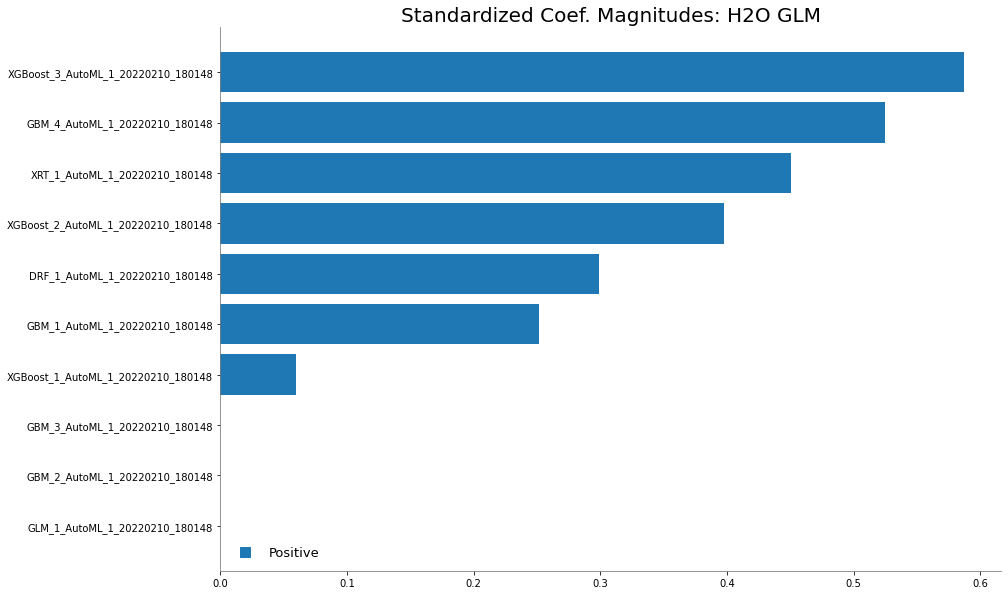

In [14]:
%matplotlib inline
metalearner.std_coef_plot()

**Save Leader Model**
There are two ways to save the leader model -- `binary format and MOJO format`. If you're taking your leader model to production, then we'd suggest the MOJO format since it's optimized for production use.

In [ ]:
h2o.save_model(aml.leader, path = "./product_backorders_model_bin")

In [ ]:
aml.leader.download_mojo(path = "./")